<a href="https://colab.research.google.com/github/WanjohiWanjohi/NNGooglePathway/blob/main/Building_CVN_with_pooling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import numpy  as np
from scipy import misc
import matplotlib.pyplot as plt

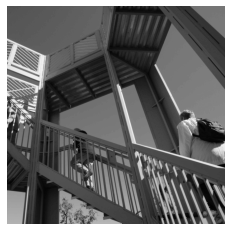

In [7]:
#get the ascent image to use for the cvn found at https://pixnio.com/people/accent-to-the-top
i = misc.ascent()

#configure gridline to false 
plt.grid(False)

#set the colormap to gray
plt.gray()

#remove the x an y axis
plt.axis('off')

#load the image into the axis
plt.imshow(i)
plt.show()

The image `i` is stored in the form of a numpy array 


```
type(i)

numpy.ndarray
```

This can be transformed.

In [10]:
i_transformed = np.copy(i)

#get the shapes of the x and y axes , the dimensions of the image , to loop over  later.
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]


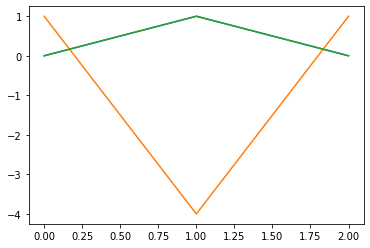

In [15]:
#make a convolution matrix that is a 3x3 array

filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]] 
plt.plot(filter)
the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so


In [ ]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      output_pixel = 0.0
      output_pixel = output_pixel + (i[x - 1, y-1] * filter[0][0])
      output_pixel = output_pixel + (i[x, y-1] * filter[0][1])
      output_pixel = output_pixel + (i[x + 1, y-1] * filter[0][2])
      output_pixel = output_pixel + (i[x-1, y] * filter[1][0])
      output_pixel = output_pixel + (i[x, y] * filter[1][1])
      output_pixel = output_pixel + (i[x+1, y] * filter[1][2])
      output_pixel = output_pixel + (i[x-1, y+1] * filter[2][0])
      output_pixel = output_pixel + (i[x, y+1] * filter[2][1])
      output_pixel = output_pixel + (i[x+1, y+1] * filter[2][2])
      output_pixel = output_pixel * weight
      if(output_pixel<0):
        output_pixel=0
      if(output_pixel>255):
        output_pixel=255
      i_transformed[x, y] = output_pixel

Back
# i dont understan what this cell does
#i think it builds the convolution

In [ ]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show()   

In [ ]:
#code for pooling

new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    pixels.sort(reverse=True)
    newImage[int(x/2),int(y/2)] = pixels[0]
 
# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()

1f5ebdafd1db2595.png